# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os

# Import Zillow Data

In [2]:
# Load target data
home_prices = pd.read_csv('raw_data/zillow/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')

home_prices.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,232527.0,...,1124579.0,1119261.0,1114733.0,1112570.0,1113554.0,1108906.0,1104331.0,1098915.0,1089614.0,1090168.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,208780.0,...,488778.0,489319.0,490664.0,492714.0,495483.0,498200.0,500780.0,503294.0,505577.0,508007.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,184917.0,...,913735.0,916274.0,916593.0,920113.0,931353.0,934916.0,934687.0,930893.0,934775.0,945772.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,199929.0,...,336901.0,337728.0,338452.0,339876.0,341435.0,343897.0,346910.0,351188.0,355336.0,360190.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,281068.0,...,629766.0,629807.0,630985.0,632529.0,635442.0,638288.0,641416.0,644506.0,647307.0,650905.0


## Narrow data to only include Nashville

In [3]:
nashville_df = home_prices[(home_prices['City']=="Nashville") & (home_prices['State']=='TN')]
nashville_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
15,74101,16,37013,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109670.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
23,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,106734.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
979,74252,988,37221,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,147818.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
1059,74240,1068,37209,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109565.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
1162,74157,1171,37076,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,111805.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0
1349,74178,1362,37115,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,83431.0,...,221906.0,223547.0,225470.0,227345.0,229725.0,231768.0,233924.0,236437.0,238750.0,240945.0
1935,74238,1951,37207,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,88757.0,...,260175.0,262039.0,264413.0,267231.0,271242.0,275291.0,279386.0,283637.0,287225.0,290689.0
2201,74245,2218,37214,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,90986.0,...,256530.0,258352.0,260171.0,262305.0,264870.0,267812.0,270533.0,273683.0,276198.0,278854.0
2451,74234,2471,37203,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,147659.0,...,434632.0,436116.0,437853.0,440109.0,442457.0,444604.0,446004.0,447759.0,448556.0,449048.0
2621,74248,2645,37217,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,87304.0,...,228782.0,230040.0,231415.0,232757.0,234680.0,236802.0,238992.0,241559.0,243559.0,245680.0


# Import Airbnb Data

## Create list containing all listing files

In [4]:
listing_files = glob('raw_data/airbnb/listings/*.csv.gz')
listing_files

['raw_data/airbnb/listings\\listings_10_15.csv.gz',
 'raw_data/airbnb/listings\\listings_10_18.csv.gz',
 'raw_data/airbnb/listings\\listings_10_19.csv.gz',
 'raw_data/airbnb/listings\\listings_10_20.csv.gz',
 'raw_data/airbnb/listings\\listings_11_18.csv.gz',
 'raw_data/airbnb/listings\\listings_11_19.csv.gz',
 'raw_data/airbnb/listings\\listings_11_20.csv.gz',
 'raw_data/airbnb/listings\\listings_12_18.csv.gz',
 'raw_data/airbnb/listings\\listings_12_19.csv.gz',
 'raw_data/airbnb/listings\\listings_12_20.csv.gz',
 'raw_data/airbnb/listings\\listings_1_19.csv.gz',
 'raw_data/airbnb/listings\\listings_1_20.csv.gz',
 'raw_data/airbnb/listings\\listings_1_21.csv.gz',
 'raw_data/airbnb/listings\\listings_2_19.csv.gz',
 'raw_data/airbnb/listings\\listings_2_20.csv.gz',
 'raw_data/airbnb/listings\\listings_2_21.csv.gz',
 'raw_data/airbnb/listings\\listings_3_19.csv.gz',
 'raw_data/airbnb/listings\\listings_3_20.csv.gz',
 'raw_data/airbnb/listings\\listings_4_18.csv.gz',
 'raw_data/airbnb/lis

## Create a list of dataframes from the listings

In [5]:
dfs = []
for file in listing_files:
    df = pd.read_csv(file, index_col=0, header=0)
    dfs.append(df)

## Concatenate all the listing dataframes

In [6]:
airbnb_df = pd.concat(dfs, axis=0, ignore_index=False)

airbnb_df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathrooms_text,number_of_reviews_l30d,last_searched,region_id,region_name,region_parent_id
id,,,,,,,,,,,,,,,,,,,,,
5795487,https://www.airbnb.com/rooms/5795487,20151002210713,2015-10-03,Luxurious Cozy Guesthouse Retreat,650 sq ft - completely private & separate from...,NaN,650 sq ft - completely private & separate from...,none,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8082102,https://www.airbnb.com/rooms/8082102,20151002210713,2015-10-03,Jetty's Renaissance Ranch,"Relax in this tranquil, rural, Ranch home Tuck...",Located on a private dead end road; establishe...,"Relax in this tranquil, rural, Ranch home Tuck...",none,"It is very tranquil, Yet a short drive to Nash...",Very quiet the perfect relaxing setting for th...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2480117,https://www.airbnb.com/rooms/2480117,20151002210713,2015-10-03,Roomy Teal Room,Our beautiful home features the Roomy Teal Roo...,Our space is clean and comfortable. Tracey is ...,Our beautiful home features the Roomy Teal Roo...,none,Tracy (phone number hidden) Live in house manager,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8291271,https://www.airbnb.com/rooms/8291271,20151002210713,2015-10-03,Private Suite (Apartment style),This is a mother-n-law private suite with full...,The space is over 1000+ sqft. It's a lovely q...,This is a mother-n-law private suite with full...,none,"This is a very established neighborhood, surro...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997187,https://www.airbnb.com/rooms/997187,20151002210713,2015-10-03,2 private rooms in Nashville,"House Rules. 1. No over night quests, or addit...",This is a brand new home and a beautiful place...,"House Rules. 1. No over night quests, or addit...",none,This community is wonderful. It is a very safe...,I do not allow any pets.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#can use last scraped as a proxy for date
airbnb_df.last_scraped.value_counts()

2020-02-22    7574
2020-01-14    7506
2019-11-20    7396
2019-10-18    7371
2019-08-14    7200
              ... 
2020-10-01       1
2019-07-15       1
2020-09-06       1
2021-02-25       1
2019-10-11       1
Name: last_scraped, Length: 77, dtype: int64

In [8]:
airbnb_df.reset_index(inplace=True)

In [9]:
airbnb_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathrooms_text,number_of_reviews_l30d,last_searched,region_id,region_name,region_parent_id
0,5795487,https://www.airbnb.com/rooms/5795487,20151002210713,2015-10-03,Luxurious Cozy Guesthouse Retreat,650 sq ft - completely private & separate from...,NaN,650 sq ft - completely private & separate from...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8082102,https://www.airbnb.com/rooms/8082102,20151002210713,2015-10-03,Jetty's Renaissance Ranch,"Relax in this tranquil, rural, Ranch home Tuck...",Located on a private dead end road; establishe...,"Relax in this tranquil, rural, Ranch home Tuck...",none,"It is very tranquil, Yet a short drive to Nash...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2480117,https://www.airbnb.com/rooms/2480117,20151002210713,2015-10-03,Roomy Teal Room,Our beautiful home features the Roomy Teal Roo...,Our space is clean and comfortable. Tracey is ...,Our beautiful home features the Roomy Teal Roo...,none,Tracy (phone number hidden) Live in house manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8291271,https://www.airbnb.com/rooms/8291271,20151002210713,2015-10-03,Private Suite (Apartment style),This is a mother-n-law private suite with full...,The space is over 1000+ sqft. It's a lovely q...,This is a mother-n-law private suite with full...,none,"This is a very established neighborhood, surro...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,997187,https://www.airbnb.com/rooms/997187,20151002210713,2015-10-03,2 private rooms in Nashville,"House Rules. 1. No over night quests, or addit...",This is a brand new home and a beautiful place...,"House Rules. 1. No over night quests, or addit...",none,This community is wonderful. It is a very safe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
airbnb_df.id.value_counts()

1376970     38
6446261     38
3686152     38
1006989     38
1954040     38
            ..
8335985      1
14573396     1
45766485     1
18872161     1
33527757     1
Name: id, Length: 19451, dtype: int64

## Import most recent reviews and calendar data

In [12]:
import pandas as pd
listings_df = pd.read_csv('raw_data/airbnb/listings/listings_9_20.csv.gz', compression='gzip')
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,20847,https://www.airbnb.com/rooms/20847,20200928025323,2020-09-28,East Nashville Retro Ranch!,This listing is no longer available for short ...,"Many local favorites, including live music, th...",https://a0.muscache.com/pictures/36034958/8976...,79021,https://www.airbnb.com/users/show/79021,...,10.0,9.0,9.0,NaN,f,3,0,3,0,1.07
1,25341,https://www.airbnb.com/rooms/25341,20200928025323,2020-09-28,East Nashville Retro Ranch BR #2,This listing is no longer available for short ...,"Many local favorites, including live music, th...",https://a0.muscache.com/pictures/37248835/52aa...,79021,https://www.airbnb.com/users/show/79021,...,10.0,9.0,10.0,NaN,f,3,0,3,0,0.85
2,25342,https://www.airbnb.com/rooms/25342,20200928025323,2020-09-29,East Nashville Retro Ranch BR #3,This listing is no longer available for short ...,"Many local favorites, including live music, th...",https://a0.muscache.com/pictures/36655215/0907...,79021,https://www.airbnb.com/users/show/79021,...,10.0,9.0,9.0,NaN,f,3,0,3,0,0.04
3,25613,https://www.airbnb.com/rooms/25613,20200928025323,2020-09-29,Room in Historic East Nashville Craftsman Home,Serve up some sweet sounds on the piano and wi...,This home is in a walkable neighborhood with i...,https://a0.muscache.com/pictures/60aa90fe-1b3f...,95811,https://www.airbnb.com/users/show/95811,...,10.0,10.0,10.0,NaN,t,1,0,1,0,4.01
4,37306,https://www.airbnb.com/rooms/37306,20200928025323,2020-09-28,Private Room for Women and Couples in a Histor...,Step onto the porch of a preserved period hous...,"The house is in Woodland-in-Waverly, the oldes...",https://a0.muscache.com/pictures/3b23fa25-f800...,161033,https://www.airbnb.com/users/show/161033,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.96


In [13]:
reviews_df = pd.read_csv('raw_data/airbnb/reviews_2_21.csv.gz', compression='gzip')
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...
1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...
2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...
3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...
4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...


In [14]:
calendar_df = pd.read_csv('raw_data/airbnb/calendar_2_21.csv.gz', compression='gzip')
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6422,2021-02-20,f,$40.00,$40.00,30.0,365.0
1,6422,2021-02-21,f,$40.00,$40.00,30.0,365.0
2,6422,2021-02-22,f,$40.00,$40.00,30.0,365.0
3,6422,2021-02-23,f,$40.00,$40.00,30.0,365.0
4,6422,2021-02-24,f,$40.00,$40.00,30.0,365.0


# Clean Zillow Data

In [15]:
nashville_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
15,74101,16,37013,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109670.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
23,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,106734.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
979,74252,988,37221,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,147818.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
1059,74240,1068,37209,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109565.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
1162,74157,1171,37076,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,111805.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0


## Drop Unnecessary Columns

In [16]:
# only interested in zipcode and price for each date
nashville_prices_df = nashville_df.drop(columns=['RegionID', 'SizeRank', 'RegionType', 
                                                 'StateName', 'State', 'City', 'Metro', 'CountyName'])

In [17]:
nashville_prices_df.head()

,RegionName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
15,37013,109670.0,110113.0,110502.0,111295.0,112128.0,112982.0,113867.0,114736.0,115551.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
23,37211,106734.0,107099.0,107465.0,108224.0,108963.0,109639.0,110367.0,111082.0,111876.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
979,37221,147818.0,148278.0,148776.0,149757.0,150615.0,151485.0,152349.0,153349.0,154261.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
1059,37209,109565.0,109833.0,110119.0,110736.0,111338.0,112027.0,112493.0,113092.0,113650.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
1162,37076,111805.0,112174.0,112465.0,113059.0,113683.0,114306.0,114862.0,115347.0,115830.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0


## Set up dataframe with date as the index and zipcodes as the columns

In [18]:
# set region name as index so it becomes the columns after transposing
nashville_prices_df.set_index('RegionName', inplace=True)
nashville_prices_df.head()

,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
RegionName,,,,,,,,,,,,,,,,,,,,,
37013,109670.0,110113.0,110502.0,111295.0,112128.0,112982.0,113867.0,114736.0,115551.0,116199.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
37211,106734.0,107099.0,107465.0,108224.0,108963.0,109639.0,110367.0,111082.0,111876.0,112514.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
37221,147818.0,148278.0,148776.0,149757.0,150615.0,151485.0,152349.0,153349.0,154261.0,155079.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
37209,109565.0,109833.0,110119.0,110736.0,111338.0,112027.0,112493.0,113092.0,113650.0,114305.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
37076,111805.0,112174.0,112465.0,113059.0,113683.0,114306.0,114862.0,115347.0,115830.0,116427.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0


In [19]:
# transpose date and zipcode
nashville_prices_df = nashville_prices_df.transpose()
nashville_prices_df.head()

RegionName,37013,37211,37221,37209,37076,37115,37207,37214,37203,37217,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
1996-01-31,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,87304.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1996-02-29,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,87676.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
1996-03-31,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,87963.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
1996-04-30,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,88595.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
1996-05-31,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,89211.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN


In [20]:
# reset index so we can convert dates to datetime datatype
nashville_prices_df.reset_index(inplace=True)
nashville_prices_df.head()

RegionName,index,37013,37211,37221,37209,37076,37115,37207,37214,37203,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
0,1996-01-31,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1,1996-02-29,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
2,1996-03-31,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
3,1996-04-30,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
4,1996-05-31,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN


In [21]:
# convert dates to datetime datatype
nashville_prices_df['index'] = pd.to_datetime(nashville_prices_df['index'])

In [22]:
# set date as the index
nashville_prices_df.set_index('index', inplace=True)
nashville_prices_df

RegionName,37013,37211,37221,37209,37076,37115,37207,37214,37203,37217,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
index,,,,,,,,,,,,,,,,,,,,,
1996-01-31,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,87304.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1996-02-29,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,87676.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
1996-03-31,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,87963.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
1996-04-30,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,88595.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
1996-05-31,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,89211.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,259031.0,293072.0,352922.0,372219.0,276223.0,231768.0,275291.0,267812.0,444604.0,236802.0,...,353126.0,544627.0,287125.0,649146.0,241525.0,244317.0,561117.0,430796.0,266038.0,383293.0
2020-11-30,261394.0,295822.0,355478.0,375011.0,278581.0,233924.0,279386.0,270533.0,446004.0,238992.0,...,356012.0,546918.0,289395.0,654508.0,242735.0,246970.0,566165.0,430763.0,268952.0,383351.0
2020-12-31,264071.0,299249.0,358583.0,378519.0,281249.0,236437.0,283637.0,273683.0,447759.0,241559.0,...,359699.0,550457.0,292281.0,660564.0,244148.0,249040.0,572388.0,432595.0,271794.0,383955.0


## Further explore cleaned zillow dataframe

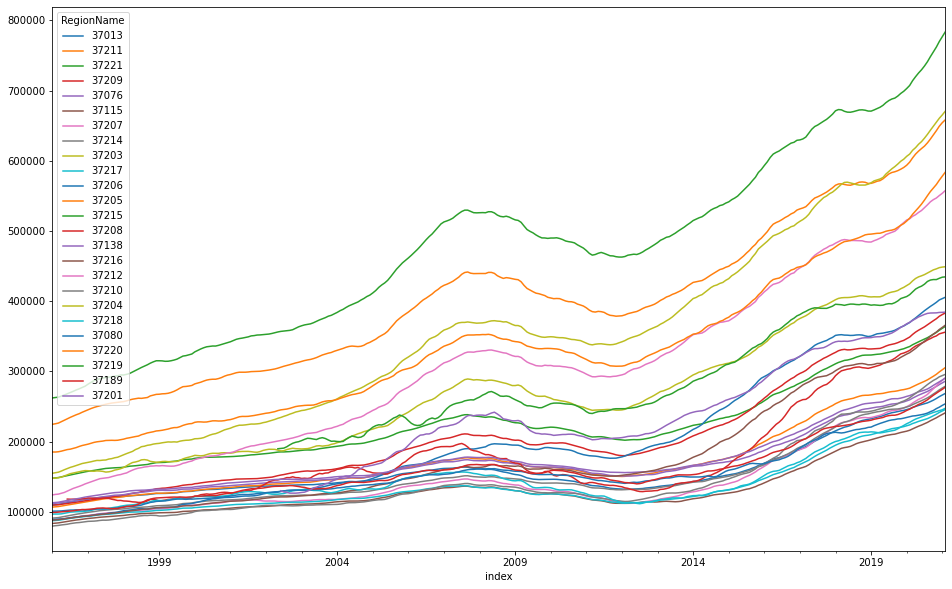

In [23]:
nashville_prices_df.plot(figsize = (16,10), subplots=False, legend=True);

In [24]:
# view column names and datatypes
nashville_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302 entries, 1996-01-31 to 2021-02-28
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   37013   302 non-null    float64
 1   37211   302 non-null    float64
 2   37221   302 non-null    float64
 3   37209   302 non-null    float64
 4   37076   302 non-null    float64
 5   37115   302 non-null    float64
 6   37207   302 non-null    float64
 7   37214   302 non-null    float64
 8   37203   302 non-null    float64
 9   37217   302 non-null    float64
 10  37206   302 non-null    float64
 11  37205   302 non-null    float64
 12  37215   302 non-null    float64
 13  37208   297 non-null    float64
 14  37138   302 non-null    float64
 15  37216   302 non-null    float64
 16  37212   302 non-null    float64
 17  37210   302 non-null    float64
 18  37204   302 non-null    float64
 19  37218   302 non-null    float64
 20  37080   302 non-null    float64
 21  37220   302 non-null

In [25]:
# view missing values
nashville_prices_df.isna().sum()

RegionName
37013     0
37211     0
37221     0
37209     0
37076     0
37115     0
37207     0
37214     0
37203     0
37217     0
37206     0
37205     0
37215     0
37208     5
37138     0
37216     0
37212     0
37210     0
37204     0
37218     0
37080     0
37220     0
37219    76
37189     0
37201    77
dtype: int64

In [26]:
# save cleaned airbnb dataframe
nashville_prices_df.to_csv("cleaned_data/zillow_data_clean.csv")

# Clean Airbnb Data

In [27]:
airbnb_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathrooms_text,number_of_reviews_l30d,last_searched,region_id,region_name,region_parent_id
0,5795487,https://www.airbnb.com/rooms/5795487,20151002210713,2015-10-03,Luxurious Cozy Guesthouse Retreat,650 sq ft - completely private & separate from...,NaN,650 sq ft - completely private & separate from...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8082102,https://www.airbnb.com/rooms/8082102,20151002210713,2015-10-03,Jetty's Renaissance Ranch,"Relax in this tranquil, rural, Ranch home Tuck...",Located on a private dead end road; establishe...,"Relax in this tranquil, rural, Ranch home Tuck...",none,"It is very tranquil, Yet a short drive to Nash...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2480117,https://www.airbnb.com/rooms/2480117,20151002210713,2015-10-03,Roomy Teal Room,Our beautiful home features the Roomy Teal Roo...,Our space is clean and comfortable. Tracey is ...,Our beautiful home features the Roomy Teal Roo...,none,Tracy (phone number hidden) Live in house manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8291271,https://www.airbnb.com/rooms/8291271,20151002210713,2015-10-03,Private Suite (Apartment style),This is a mother-n-law private suite with full...,The space is over 1000+ sqft. It's a lovely q...,This is a mother-n-law private suite with full...,none,"This is a very established neighborhood, surro...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,997187,https://www.airbnb.com/rooms/997187,20151002210713,2015-10-03,2 private rooms in Nashville,"House Rules. 1. No over night quests, or addit...",This is a brand new home and a beautiful place...,"House Rules. 1. No over night quests, or addit...",none,This community is wonderful. It is a very safe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Explore columns and column values

In [28]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233411 entries, 0 to 233410
Columns: 112 entries, id to region_parent_id
dtypes: float64(34), int64(9), object(69)
memory usage: 199.4+ MB


In [29]:
# print all 111 column names
for col_name in airbnb_df.columns:
    print(col_name)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_re

In [30]:
# print top 5 values for each column
for col in airbnb_df.columns:
    print(col)
    print(airbnb_df[col].value_counts(dropna=False).head())
    print('\n')

id
1376970    38
6446261    38
3686152    38
1006989    38
1954040    38
Name: id, dtype: int64


listing_url
https://www.airbnb.com/rooms/6227228    38
https://www.airbnb.com/rooms/2666769    38
https://www.airbnb.com/rooms/1300996    38
https://www.airbnb.com/rooms/3811909    38
https://www.airbnb.com/rooms/4170603    38
Name: listing_url, dtype: int64


scrape_id
20200317212909    7578
20200222045830    7574
20200114005522    7506
20191215213810    7496
20200421142847    7436
Name: scrape_id, dtype: int64


last_scraped
2020-02-22    7574
2020-01-14    7506
2019-11-20    7396
2019-10-18    7371
2019-08-14    7200
Name: last_scraped, dtype: int64


name
Wyndham Nashville - 2 Bedroom Condo                 192
East Nashville Bungalow                             132
Live + Work + Stay + Easy  | 1BR in Nashville       109
Margaritaville, New Studio near Broadway and HOF    100
Cozy East Nashville Home                             96
Name: name, dtype: int64


summary
NaN                  

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            116118
Check in is anytime after 3 pm and check out is at 11 am. Early Check in and check out can be requ

https://a0.muscache.com/pictures/f99bdae7-2d2b-4722-8e89-4d5113d3e848.jpg                        136
https://a0.muscache.com/im/pictures/7cd4361d-e669-4a23-8330-b54904f18b03.jpg?aki_policy=large    120
https://a0.muscache.com/im/pictures/0046c6eb-645e-4f93-a53c-7219fc5c6749.jpg?aki_policy=large    111
https://a0.muscache.com/pictures/7cd4361d-e669-4a23-8330-b54904f18b03.jpg                        105
https://a0.muscache.com/pictures/0ebd9713-b2e5-42ca-a9f4-d760823f0b15.jpg                         86
Name: picture_url, dtype: int64


xl_picture_url
NaN                                                                                                                                                     221930
https://a0.muscache.com/im/pictures/97981885/809e93c8_original.jpg?aki_policy=x_large                                                                        2
https://a1.muscache.com/ac/pictures/80411846/6dd92eed_original.jpg?interpolation=lanczos-none&size=x_large_cover&output-format=j

https://a0.muscache.com/im/pictures/user/e96227e0-8f49-4ef4-8f22-5ae782ec06c3.jpg?aki_policy=profile_x_medium    5125
https://a0.muscache.com/im/pictures/user/4587b5c1-3fbe-4ccb-bf50-62ae279162a7.jpg?aki_policy=profile_x_medium    4933
https://a0.muscache.com/im/pictures/user/ec598420-f3f0-4c5d-9618-d1b6125d8c43.jpg?aki_policy=profile_x_medium    2969
https://a0.muscache.com/im/pictures/1c4575aa-5d97-46ce-9799-c8e9deadff86.jpg?aki_policy=profile_x_medium         2705
https://a0.muscache.com/im/pictures/user/9bc8d798-a8d6-485f-966d-6e5e3f3c64d5.jpg?aki_policy=profile_x_medium    2115
Name: host_picture_url, dtype: int64


host_neighbourhood
NaN                          190276
Central Business District      5532
Edgehill                       4822
Downtown                       4149
North Nashville                2383
Name: host_neighbourhood, dtype: int64


host_listings_count
1.0    78044
2.0    28920
3.0    13672
0.0     8929
4.0     8264
Name: host_listings_count, dtype: int64


host

t      230007
NaN      3277
f         127
Name: has_availability, dtype: int64


availability_30
0     46932
30    14491
16     7536
15     7409
14     7307
Name: availability_30, dtype: int64


availability_60
0     37555
60    10464
59     4514
40     4276
39     4233
Name: availability_60, dtype: int64


availability_90
0     32783
90     8902
89     4348
74     3435
83     3395
Name: availability_90, dtype: int64


availability_365
0      26002
365     4033
364     2197
1       1471
345     1341
Name: availability_365, dtype: int64


calendar_last_scraped
2020-02-22    7574
2020-01-14    7506
2019-11-20    7396
2019-10-18    7371
2019-08-14    7200
Name: calendar_last_scraped, dtype: int64


number_of_reviews
0    31531
1    12793
2     8986
3     6985
4     6227
Name: number_of_reviews, dtype: int64


first_review
NaN           31575
2019-04-28     1203
2018-01-01      979
2017-08-22      968
2017-08-21      942
Name: first_review, dtype: int64


last_review
NaN           31571
20

NaN          190804
1 bath        17852
2 baths        6975
2.5 baths      3532
3.5 baths      3472
Name: bathrooms_text, dtype: int64


number_of_reviews_l30d
NaN    190772
0.0     26188
1.0      6313
2.0      3814
3.0      2502
Name: number_of_reviews_l30d, dtype: int64


last_searched
NaN           231675
2015-06-22      1668
2015-06-23        43
2015-06-24        11
2015-06-25         8
Name: last_searched, dtype: int64


region_id
NaN     231675
37.0      1735
21.0         1
Name: region_id, dtype: int64


region_name
NaN         231675
Davidson      1735
Cheatham         1
Name: region_name, dtype: int64


region_parent_id
NaN     231675
47.0      1736
Name: region_parent_id, dtype: int64




## Create new dataframe of columns to be used

In [31]:
# create df of most important columns for modeling
clean_airbnb_df = airbnb_df[['last_scraped', 'id','host_id','host_is_superhost','host_listings_count',
                           'neighbourhood_cleansed', 'zipcode','latitude','longitude','property_type',
                           'room_type','accommodates','bathrooms','bedrooms','beds','price',
                           'guests_included','minimum_nights','maximum_nights','availability_30',
                           'availability_60','availability_90','number_of_reviews','review_scores_rating',
                           'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                           'review_scores_communication','review_scores_location','review_scores_value',
                           'instant_bookable','reviews_per_month','number_of_reviews_ltm','bathrooms_text']].copy()

In [32]:
clean_airbnb_df.head()

,last_scraped,id,host_id,host_is_superhost,host_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,number_of_reviews_ltm,bathrooms_text
0,2015-10-03,5795487,30066816,f,1.0,District 1,37080,36.274038,-86.910077,House,...,10.0,10.0,10.0,10.0,10.0,10.0,f,3.52,NaN,NaN
1,2015-10-03,8082102,55304,f,1.0,District 1,37189,36.259632,-86.870691,House,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
2,2015-10-03,2480117,3155867,f,3.0,District 1,37218,36.217547,-86.843971,House,...,8.0,8.0,9.0,9.0,8.0,9.0,t,3.34,NaN,NaN
3,2015-10-03,8291271,1356379,f,1.0,District 1,37218,36.212933,-86.853004,House,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
4,2015-10-03,997187,5479170,f,1.0,District 1,37218,36.221009,-86.873935,House,...,8.0,10.0,10.0,10.0,10.0,10.0,f,0.15,NaN,NaN


In [33]:
# inspect new df - now 34 columns
clean_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233411 entries, 0 to 233410
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   last_scraped                 233411 non-null  object 
 1   id                           233411 non-null  int64  
 2   host_id                      233411 non-null  int64  
 3   host_is_superhost            233224 non-null  object 
 4   host_listings_count          233224 non-null  float64
 5   neighbourhood_cleansed       233411 non-null  object 
 6   zipcode                      189855 non-null  object 
 7   latitude                     233411 non-null  float64
 8   longitude                    233411 non-null  float64
 9   property_type                233410 non-null  object 
 10  room_type                    233411 non-null  object 
 11  accommodates                 233411 non-null  int64  
 12  bathrooms                    190749 non-null  float64
 13 

## Change price column datatype

In [34]:
def convert_dol_to_float(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('float')
    return df

In [35]:
clean_airbnb_df = convert_dol_to_float(clean_airbnb_df, 'price')

In [36]:
# confirm datatype changed
clean_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233411 entries, 0 to 233410
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   last_scraped                 233411 non-null  object 
 1   id                           233411 non-null  int64  
 2   host_id                      233411 non-null  int64  
 3   host_is_superhost            233224 non-null  object 
 4   host_listings_count          233224 non-null  float64
 5   neighbourhood_cleansed       233411 non-null  object 
 6   zipcode                      189855 non-null  object 
 7   latitude                     233411 non-null  float64
 8   longitude                    233411 non-null  float64
 9   property_type                233410 non-null  object 
 10  room_type                    233411 non-null  object 
 11  accommodates                 233411 non-null  int64  
 12  bathrooms                    190749 non-null  float64
 13 

## Handle missing zipcode values - to be used for location

### Explore zipcode and neighbourhood values

In [37]:
clean_airbnb_df['zipcode'].nunique()

86

In [38]:
clean_airbnb_df['neighbourhood_cleansed'].nunique()

35

In [39]:
clean_airbnb_df['zipcode'].value_counts(dropna=False)

NaN             43556
37203           28656
37206           24376
37212           14365
37219           12586
                ...  
37086               2
37143.0             1
37026               1
37240               1
37206\n37206        1
Name: zipcode, Length: 87, dtype: int64

### Use neighbourhood values as a proxy to fill missing zipcodes

In [40]:
# convert missing zipcode values to 0 so datatypes can be changed
clean_airbnb_df['zipcode'] = clean_airbnb_df['zipcode'].fillna(0)

In [41]:
# convert to string so only first 5 numbers can be sliced
clean_airbnb_df['zipcode'] = clean_airbnb_df['zipcode'].astype(str)

clean_airbnb_df['zipcode'] = clean_airbnb_df['zipcode'].apply(lambda x: x[0:5])

In [42]:
# check if any remaining values cannot be converted to float
clean_airbnb_df['zipcode'].value_counts(dropna=False)

0         43556
37203     28800
37206     24757
37212     14540
37219     12614
37208     12590
37209     12156
37216     11487
37207     11093
37214      8741
37204      8541
37210      8479
37211      7623
37201      6310
37205      3182
37217      2567
37215      2297
37013      2294
37076      2166
37115      1969
37221      1691
37218      1493
37072      1071
37138       840
37220       558
37228       458
37080       423
37027       406
37189       312
37143        89
\n           82
37213        41
37015        36
37073        21
37064        15
TN 37        13
37232        13
46617        10
37135         9
37029         8
37243         7
37020         7
77807         6
16823         6
48108         6
32317         6
28774         6
3720          5
37122         3
46616         2
37086         2
37222         2
37026         1
37240         1
Name: zipcode, dtype: int64

In [43]:
# convert incorrect zipcode inputs to zero so they can be handled with neighbourhood map
clean_airbnb_df['zipcode'] = clean_airbnb_df['zipcode'].replace(['\n    ','TN 37','3720'],0)

# confirm replaced worked
clean_airbnb_df['zipcode'].value_counts(dropna=False)

0        43556
37203    28800
37206    24757
37212    14540
37219    12614
37208    12590
37209    12156
37216    11487
37207    11093
37214     8741
37204     8541
37210     8479
37211     7623
37201     6310
37205     3182
37217     2567
37215     2297
37013     2294
37076     2166
37115     1969
37221     1691
37218     1493
37072     1071
37138      840
37220      558
37228      458
37080      423
37027      406
37189      312
0          100
37143       89
37213       41
37015       36
37073       21
37064       15
37232       13
46617       10
37135        9
37029        8
37243        7
37020        7
48108        6
28774        6
77807        6
32317        6
16823        6
37122        3
46616        2
37086        2
37222        2
37240        1
37026        1
Name: zipcode, dtype: int64

In [44]:
# confirmed zipcode values can be converted to numbers
clean_airbnb_df['zipcode'] = clean_airbnb_df['zipcode'].astype(int)

#### Create mapping of neighbourhoods to zipcode

In [45]:
# create list of unique neighbourhoods
districts = list(clean_airbnb_df['neighbourhood_cleansed'].unique())

In [46]:
# assign a zipcode to each unique neighbourhood based on the mode zipcode value of that neighbourhood
codes = []
for district in districts:
    code = clean_airbnb_df[clean_airbnb_df['neighbourhood_cleansed']==district]['zipcode'].mode()[0]
    codes.append(code)

In [47]:
# create dictionary of districts and their most frequent zipcodes
district_zip_dict = {districts[i]: codes[i] for i in range(len(districts))}

district_zip_dict

{'District 1': 37218,
 'District 6': 37206,
 'District 19': 37203,
 'District 13': 37214,
 'District 29': 37217,
 'District 21': 37203,
 'District 2': 37207,
 'District 8': 37216,
 'District 31': 37013,
 'District 32': 37013,
 'District 22': 37221,
 'District 23': 37205,
 'District 33': 37013,
 'District 34': 37215,
 'District 35': 37221,
 'District 9': 37115,
 'District 4': 37211,
 'District 14': 37214,
 'District 15': 37214,
 'District 16': 37211,
 'District 24': 37209,
 'District 25': 37215,
 'District 26': 37211,
 'District 27': 37211,
 'District 28': 37013,
 'District 5': 37207,
 'District 7': 37216,
 'District 3': 37207,
 'District 10': 37072,
 'District 17': 37203,
 'District 18': 37212,
 'District 20': 37209,
 'District 12': 37076,
 'District 11': 37138,
 'District 30': 37211}

In [48]:
# convert any zipcode of 0 to nan to set up for use of fillna() function
clean_airbnb_df['zipcode'].replace(0, np.nan, inplace=True)

In [49]:
# map district_zip_dict created to missing values in zipcodes
clean_airbnb_df['zipcode'] = clean_airbnb_df['zipcode'].fillna(clean_airbnb_df['neighbourhood_cleansed'].map(district_zip_dict))

clean_airbnb_df['zipcode'].value_counts()

37203.0    48568
37206.0    28312
37207.0    16509
37212.0    16474
37209.0    14276
37216.0    14200
37219.0    12614
37208.0    12590
37214.0    11415
37211.0     9717
37204.0     8541
37210.0     8479
37201.0     6310
37205.0     3402
37215.0     2971
37013.0     2842
37217.0     2835
37076.0     2563
37115.0     2096
37221.0     2078
37218.0     1833
37072.0     1307
37138.0     1025
37220.0      558
37228.0      458
37080.0      423
37027.0      406
37189.0      312
37143.0       89
37213.0       41
37015.0       36
37073.0       21
37064.0       15
37232.0       13
46617.0       10
37135.0        9
37029.0        8
37243.0        7
37020.0        7
32317.0        6
48108.0        6
77807.0        6
28774.0        6
16823.0        6
37122.0        3
37086.0        2
37222.0        2
46616.0        2
37240.0        1
37026.0        1
Name: zipcode, dtype: int64

### Drop zipcodes outside of Nashville

In [50]:
# confirm current number of rows
len(clean_airbnb_df)

233411

In [51]:
# drop rows for any airbnbs not actually located in Nashville
clean_airbnb_df = clean_airbnb_df.drop(clean_airbnb_df[(clean_airbnb_df['zipcode']<37000)|
                                                       (clean_airbnb_df['zipcode']>38000)].index)
# confirm number of rows updated
len(clean_airbnb_df)

233369

In [52]:
# confirm no missing zipcode values
clean_airbnb_df.zipcode.isna().sum()

0

In [53]:
# look at number of zipcodes remaining
clean_airbnb_df.zipcode.nunique()

43

## Drop/Handle Missing Values

In [54]:
# look at percentage of missing values in each column
clean_airbnb_df.isna().sum()/len(clean_airbnb_df)

last_scraped                   0.000000
id                             0.000000
host_id                        0.000000
host_is_superhost              0.000801
host_listings_count            0.000801
neighbourhood_cleansed         0.000000
zipcode                        0.000000
latitude                       0.000000
longitude                      0.000000
property_type                  0.000004
room_type                      0.000000
accommodates                   0.000000
bathrooms                      0.182809
bedrooms                       0.039543
beds                           0.029490
price                          0.028628
guests_included                0.182711
minimum_nights                 0.028628
maximum_nights                 0.028628
availability_30                0.000000
availability_60                0.000000
availability_90                0.000000
number_of_reviews              0.000000
review_scores_rating           0.139144
review_scores_accuracy         0.141758


### Replace missing values in certain columns

In [56]:
clean_airbnb_df['host_is_superhost'] = clean_airbnb_df['host_is_superhost'].fillna('f')

In [57]:
# replace host listings count with 0 for now--we will try to calculate on our own later
clean_airbnb_df['host_listings_count'] = clean_airbnb_df['host_listings_count'].fillna(0)

### Compare Bathrooms_Text and Bathrooms columns to fill in missing values

In [58]:
clean_airbnb_df.bathrooms_text.value_counts(dropna=False)

NaN                  190762
1 bath                17852
2 baths                6975
2.5 baths              3532
3.5 baths              3472
3 baths                2616
1 private bath         2334
1.5 baths              1578
4 baths                1241
1 shared bath          1142
4.5 baths               300
1.5 shared baths        287
7 baths                 241
5 baths                 185
6 baths                 152
8 baths                 136
2 shared baths           89
0 baths                  63
9 baths                  56
5.5 baths                55
7.5 baths                47
6.5 baths                45
10.5 baths               24
14 baths                 22
10 baths                 21
Half-bath                18
9.5 baths                14
12 baths                 13
7 shared baths           12
2.5 shared baths         11
16 baths                  9
3 shared baths            9
3.5 shared baths          8
17 baths                  7
15 shared baths           7
Private half-bath   

In [59]:
# create a formula to slice number of bathrooms from the text
clean_airbnb_df['bathrooms_text'] = clean_airbnb_df['bathrooms_text'].fillna('0')

clean_airbnb_df['bathrooms_text'] = clean_airbnb_df['bathrooms_text'].apply(lambda x: x.split()[0])
clean_airbnb_df.bathrooms_text.value_counts(dropna=False)

0            190830
1             21328
2              7064
2.5            3543
3.5            3480
3              2625
1.5            1865
4              1241
4.5             300
7               253
5               185
6               152
8               136
9                56
5.5              55
7.5              47
6.5              45
10.5             24
14               22
10               21
Half-bath        18
9.5              14
15               14
12               13
16                9
17                7
Private           7
19                7
11                3
8.5               3
Shared            1
12.5              1
Name: bathrooms_text, dtype: int64

In [60]:
# handle non-numerical values in bathrooms_text
clean_airbnb_df['bathrooms_text'] = clean_airbnb_df['bathrooms_text'].replace(['Half-bath','Private','Shared'],[0.5,1,1])
# convert to float
clean_airbnb_df['bathrooms_text'] = clean_airbnb_df['bathrooms_text'].astype(float)

In [61]:
# fill any bathroom missing values with number from bathrooms_text
clean_airbnb_df['bathrooms'] = clean_airbnb_df['bathrooms'].fillna(clean_airbnb_df['bathrooms_text'])

In [62]:
# convert any zeros back to nans to be further handled
clean_airbnb_df['bathrooms'].replace(0, np.nan, inplace=True)

In [63]:
# can now drop bathrooms_text column
clean_airbnb_df.drop(columns=['bathrooms_text'],inplace=True)

### Compare Beds and Bedrooms columns to fill in missing values

In [64]:
# check how many missing values for beds and bedrooms
print('{} missing values for beds.'.format(clean_airbnb_df['beds'].isna().sum()))
print('{} missing values for bedrooms.'.format(clean_airbnb_df['bedrooms'].isna().sum()))     

6882 missing values for beds.
9228 missing values for bedrooms.


In [65]:
# since there are more missing values for bedrooms, we will keep the beds column
clean_airbnb_df['beds'] = clean_airbnb_df['beds'].fillna(clean_airbnb_df['bedrooms'])

In [66]:
clean_airbnb_df['beds'].isna().sum()

6705

In [67]:
clean_airbnb_df[clean_airbnb_df['beds'].isnull()]

,last_scraped,id,host_id,host_is_superhost,host_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,number_of_reviews_ltm
20173,2020-10-24,42166464,209608937,f,0.0,District 6,37206.0,36.18914,-86.73633,Private room in serviced apartment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,0.0
39414,2020-11-10,42166464,209608937,f,0.0,District 6,37206.0,36.18914,-86.73633,Private room in serviced apartment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,0.0
40382,2020-11-10,45546185,76430844,f,1.0,District 19,37203.0,36.17949,-86.79600,Entire loft,...,20.0,4.0,4.0,6.0,6.0,2.0,2.0,t,1.00,1.0
58651,2020-12-21,42166464,209608937,f,0.0,District 6,37206.0,36.18914,-86.73633,Private room in serviced apartment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,0.0
59593,2020-12-21,45546185,76430844,f,1.0,District 19,37203.0,36.17949,-86.79600,Entire loft,...,20.0,4.0,4.0,6.0,6.0,2.0,2.0,t,0.68,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186554,2020-07-27,44390874,6675690,t,63.0,District 5,37206.0,36.18658,-86.75566,Townhouse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,0.0
186555,2020-07-28,44391018,6675690,t,63.0,District 5,37206.0,36.18582,-86.75414,Townhouse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,0.0
186556,2020-07-28,44393746,137102937,f,1.0,District 33,37013.0,36.06413,-86.61627,House,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,0.0
204624,2020-08-31,42166464,209608937,f,0.0,District 6,37206.0,36.18917,-86.73694,Private room in serviced apartment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,0.0


In [68]:
# drop bedrooms--too similar to beds
clean_airbnb_df.drop(columns=['bedrooms'], inplace=True)

In [69]:
# drop rows that have bathrooms, bedrooms and beds missing

#reg_airbnb_df.dropna(how='all', subset=['bathrooms','bedrooms','beds'],inplace=True)

### Drop number of LTM reviews - not independent of reviews per month

In [70]:
clean_airbnb_df.drop(columns=['number_of_reviews_ltm'], inplace=True)

### Come back to Review Scores ***

### Impute Remaining Missing Values

In [71]:
# reexamine percentage of missing values
clean_airbnb_df.isna().sum()/len(clean_airbnb_df)

last_scraped                   0.000000
id                             0.000000
host_id                        0.000000
host_is_superhost              0.000000
host_listings_count            0.000000
neighbourhood_cleansed         0.000000
zipcode                        0.000000
latitude                       0.000000
longitude                      0.000000
property_type                  0.000004
room_type                      0.000000
accommodates                   0.000000
bathrooms                      0.001474
beds                           0.028731
price                          0.028628
guests_included                0.182711
minimum_nights                 0.028628
maximum_nights                 0.028628
availability_30                0.000000
availability_60                0.000000
availability_90                0.000000
number_of_reviews              0.000000
review_scores_rating           0.139144
review_scores_accuracy         0.141758
review_scores_cleanliness      0.141518


In [72]:
# look at statistics of each continuous column
clean_airbnb_df.describe()

,id,host_id,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,...,availability_90,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,2.333690e+05,2.333690e+05,233369.000000,233369.000000,233369.000000,233369.000000,233369.000000,233025.000000,226664.000000,226688.000000,...,233369.000000,233369.000000,200897.000000,200287.000000,200343.000000,200177.000000,200335.000000,200162.000000,200095.000000,200439.00000
mean,2.326381e+07,8.655238e+07,97.365186,37202.252171,36.160338,-86.769233,5.948828,1.782950,3.322063,256.724180,...,49.389555,48.432680,96.445437,9.818495,9.715024,9.880126,9.875514,9.685984,9.661251,2.67749
std,1.128357e+07,8.222902e+07,346.465645,30.842174,0.041528,0.053233,3.528161,1.183046,2.998899,495.358149,...,29.575045,73.847967,5.807288,0.597330,0.652615,0.489904,0.507781,0.631271,0.682236,2.28491
min,6.422000e+03,1.147000e+03,0.000000,37013.000000,35.984430,-87.041401,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.01000
25%,1.528475e+07,2.110413e+07,1.000000,37203.000000,36.139470,-86.795260,4.000000,1.000000,2.000000,98.000000,...,27.000000,3.000000,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,0.92000
50%,2.229379e+07,6.075922e+07,3.000000,37207.000000,36.160910,-86.777100,5.000000,1.000000,2.000000,150.000000,...,56.000000,20.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.17000
75%,3.227041e+07,1.243187e+08,22.000000,37212.000000,36.181814,-86.742200,8.000000,2.000000,4.000000,275.000000,...,74.000000,63.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.82000
max,4.822698e+07,3.885408e+08,2749.000000,37243.000000,36.398480,-86.519730,80.000000,37.000000,66.000000,25000.000000,...,90.000000,1007.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,52.40000


In [81]:
# look at most frequent value for each column
clean_airbnb_df.mode()

,last_scraped,id,host_id,host_is_superhost,host_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2020-02-22,25613,4962900.0,t,1.0,District 19,37203.0,36.11303,-86.76811,House,...,0.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2.17
1,NaN,136015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,340081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,395889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,513664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,NaN,6724955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,NaN,6729170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,NaN,6749535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,NaN,6851003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
clean_airbnb_df.isna().sum()

last_scraped                       0
id                                 0
host_id                            0
host_is_superhost                  0
host_listings_count                0
neighbourhood_cleansed             0
zipcode                            0
latitude                           0
longitude                          0
property_type                      1
room_type                          0
accommodates                       0
bathrooms                        344
beds                            6705
price                           6681
guests_included                42639
minimum_nights                  6681
maximum_nights                  6681
availability_30                    0
availability_60                    0
availability_90                    0
number_of_reviews                  0
review_scores_rating           32472
review_scores_accuracy         33082
review_scores_cleanliness      33026
review_scores_checkin          33192
review_scores_communication    33034
r

In [78]:
missing_cols =['bathrooms','beds','guests_included',
               'minimum_nights','maximum_nights','property_type','price',
               'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
              'review_scores_checkin','review_scores_communication','review_scores_location',
              'review_scores_value','reviews_per_month']

In [79]:
# use the median for continuous columns; mode for categorical
for col in missing_cols:
    try:
        median= clean_airbnb_df[col].median()
        clean_airbnb_df[col] = clean_airbnb_df[col].fillna(value=median)
    except:    
        mode = clean_airbnb_df[col].mode()[0]
        clean_airbnb_df[col] = clean_airbnb_df[col].fillna(value=mode)

In [80]:
clean_airbnb_df.isna().sum()

last_scraped                   0
id                             0
host_id                        0
host_is_superhost              0
host_listings_count            0
neighbourhood_cleansed         0
zipcode                        0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
beds                           0
price                          0
guests_included                0
minimum_nights                 0
maximum_nights                 0
availability_30                0
availability_60                0
availability_90                0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
reviews_pe

### Convert Date to DateTime type

In [82]:
clean_airbnb_df['last_scraped'] = pd.to_datetime(clean_airbnb_df['last_scraped'],format='%Y/%m/%d')
clean_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233369 entries, 0 to 233410
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   last_scraped                 233369 non-null  datetime64[ns]
 1   id                           233369 non-null  int64         
 2   host_id                      233369 non-null  int64         
 3   host_is_superhost            233369 non-null  object        
 4   host_listings_count          233369 non-null  float64       
 5   neighbourhood_cleansed       233369 non-null  object        
 6   zipcode                      233369 non-null  float64       
 7   latitude                     233369 non-null  float64       
 8   longitude                    233369 non-null  float64       
 9   property_type                233369 non-null  object        
 10  room_type                    233369 non-null  object        
 11  accommodates              

In [83]:
# save cleaned airbnb dataframe
clean_airbnb_df.to_csv("cleaned_data/airbnb_data_clean.csv")

# STOP HERE

## Deal with Categorical Variables

In [102]:
reg_airbnb_df.head()

,last_scraped,name,host_id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,number_of_reviews_ltm
0,2015-10-03,Luxurious Cozy Guesthouse Retreat,30066816,f,District 1,37080.0,36.274038,-86.910077,House,Entire home/apt,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3.52,0.0
1,2015-10-03,Jetty's Renaissance Ranch,55304,f,District 1,37189.0,36.259632,-86.870691,House,Private room,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1.00,0.0
2,2015-10-03,Roomy Teal Room,3155867,f,District 1,37218.0,36.217547,-86.843971,House,Private room,...,83.0,8.0,8.0,9.0,9.0,8.0,9.0,t,3.34,0.0
3,2015-10-03,Private Suite (Apartment style),1356379,f,District 1,37218.0,36.212933,-86.853004,House,Private room,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1.00,0.0
4,2015-10-03,2 private rooms in Nashville,5479170,f,District 1,37218.0,36.221009,-86.873935,House,Private room,...,100.0,8.0,10.0,10.0,10.0,10.0,10.0,f,0.15,0.0


- **Name** - to be dropped before modeling.
- **host_id** - to be used to create host listing count
- **host_is_superhost** - convert to binary
- **neighbourhood** - one hot encode?
- **zipcode** - one hot encode?
- **property type** - one hot encode
- **room type** - one hot encode
- **bathrooms** - convert to float
- **instant bookable** - convert to binary

In [103]:
binary_dict = {'f':0, 't':1}

reg_airbnb_df['host_is_superhost'] = reg_airbnb_df['host_is_superhost'].map(binary_dict)
reg_airbnb_df['instant_bookable'] = reg_airbnb_df['instant_bookable'].map(binary_dict)
reg_airbnb_df.head()

,last_scraped,name,host_id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,number_of_reviews_ltm
0,2015-10-03,Luxurious Cozy Guesthouse Retreat,30066816,0,District 1,37080.0,36.274038,-86.910077,House,Entire home/apt,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,3.52,0.0
1,2015-10-03,Jetty's Renaissance Ranch,55304,0,District 1,37189.0,36.259632,-86.870691,House,Private room,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.00,0.0
2,2015-10-03,Roomy Teal Room,3155867,0,District 1,37218.0,36.217547,-86.843971,House,Private room,...,83.0,8.0,8.0,9.0,9.0,8.0,9.0,1,3.34,0.0
3,2015-10-03,Private Suite (Apartment style),1356379,0,District 1,37218.0,36.212933,-86.853004,House,Private room,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.00,0.0
4,2015-10-03,2 private rooms in Nashville,5479170,0,District 1,37218.0,36.221009,-86.873935,House,Private room,...,100.0,8.0,10.0,10.0,10.0,10.0,10.0,0,0.15,0.0


In [106]:
reg_airbnb_df['bathrooms'].unique()

array([1.0, 0.5, 2.0, 1.5, 2.5, 4.5, 3.0, 3.5, '0', 4.0, 5.0, 8.0, 5.5,
       6.0, 7.0, 7.5, 6.5, 8.5, 14.0, 9.5, 11.5, 10.5, 9.0, 19.0, 24.0,
       11.0, 12.0, 17.0, 16.0, '1', '1.5', '2', '2.5', '3', '3.5', '7',
       '4.5', '4', '5.5', '8', 'Half-bath', '6', '5', '9.5', '7.5',
       'Private', '8.5', '14', '6.5', '10.5', '9', '19', '12', '17', '16',
       '10', '15', 'Shared', '11', 10.0, 15.0, 37.0, '12.5', 18.0],
      dtype=object)

In [108]:
bathroom_dict = {'Half-bath':0.5, 'Private':1, 'Shared':1}

reg_airbnb_df['bathrooms'] = reg_airbnb_df['bathrooms'].map(bathroom_dict)

In [110]:
reg_airbnb_df['bathrooms']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
233406   NaN
233407   NaN
233408   NaN
233409   NaN
233410   NaN
Name: bathrooms, Length: 233359, dtype: float64

In [111]:
reg_airbnb_df.drop(columns=['bathrooms'],inplace=True)

In [114]:
reg_airbnb_df.property_type.value_counts()

House                       0.357612
Apartment                   0.205726
Condominium                 0.066721
Townhouse                   0.064566
Entire house                0.058841
                              ...   
Room in resort              0.000017
Hut                         0.000013
Cave                        0.000004
Private room                0.000004
Shared room in townhouse    0.000004
Name: property_type, Length: 90, dtype: float64

In [120]:
prop_types = ['House', 'Apartment', 'Condominium', 'Townhouse', 'Other']

for x in reg_airbnb_df['property_type']:
    if x not in prop_types:
        x='Other'
print(reg_airbnb_df['property_type'])

0                             House
1                             House
2                             House
3                             House
4                             House
                    ...            
233406    Private room in apartment
233407        Private room in house
233408             Entire apartment
233409                 Entire house
233410                 Entire house
Name: property_type, Length: 233359, dtype: object


In [126]:
def updated_prop_type(x):
    prop_types = ['House', 'Apartment', 'Condominium', 'Townhouse', 'Other']
    if x not in prop_types:
        return 'Other'
    else:
        return x

In [127]:
reg_airbnb_df['property_type'] = reg_airbnb_df['property_type'].apply(lambda x: updated_prop_type(x))

In [128]:
reg_airbnb_df.property_type.value_counts()

Other    70981
Name: property_type, dtype: int64

#### One hot encode

In [129]:
df_cat = reg_airbnb_df[['property_type','room_type']]
df_cat.nunique()

property_type    1
room_type        4
dtype: int64

In [130]:
dummies_df = pd.get_dummies(df_cat, drop_last=True)

In [132]:
airbnb_clean_df = pd.concat([reg_airbnb_df,dummies_df], axis=1)
airbnb_clean_df.drop(columns=['property_type','room_type'], inplace=True)

In [133]:
airbnb_clean_df

,last_scraped,name,host_id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,accommodates,bedrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,number_of_reviews_ltm,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2015-10-03,Luxurious Cozy Guesthouse Retreat,30066816,0,District 1,37080.0,36.274038,-86.910077,2,1.0,...,10.0,10.0,10.0,10.0,0,3.52,0.0,0,0,0
1,2015-10-03,Jetty's Renaissance Ranch,55304,0,District 1,37189.0,36.259632,-86.870691,4,1.0,...,10.0,10.0,10.0,10.0,0,1.00,0.0,0,1,0
2,2015-10-03,Roomy Teal Room,3155867,0,District 1,37218.0,36.217547,-86.843971,2,1.0,...,9.0,9.0,8.0,9.0,1,3.34,0.0,0,1,0
3,2015-10-03,Private Suite (Apartment style),1356379,0,District 1,37218.0,36.212933,-86.853004,2,1.0,...,10.0,10.0,10.0,10.0,0,1.00,0.0,0,1,0
4,2015-10-03,2 private rooms in Nashville,5479170,0,District 1,37218.0,36.221009,-86.873935,1,1.0,...,10.0,10.0,10.0,10.0,0,0.15,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233406,2020-09-28,Private Bedroom w/ Private Bath 5 min to Downtown,205078166,1,District 19,37203.0,36.151960,-86.722620,2,1.0,...,10.0,10.0,10.0,10.0,0,1.00,0.0,0,1,0
233407,2020-09-29,Private Room in East Nashville,94998356,0,District 5,37207.0,36.208490,-86.762600,1,1.0,...,10.0,10.0,10.0,10.0,0,1.00,0.0,0,1,0
233408,2020-09-28,Nashville,43945988,0,District 19,37203.0,36.167450,-86.782230,4,1.0,...,10.0,10.0,10.0,10.0,0,1.00,0.0,0,0,0
233409,2020-09-28,**New** Large Family / Business Group Dream House,10919198,0,District 6,37206.0,36.191050,-86.730820,13,4.0,...,10.0,10.0,10.0,10.0,0,1.00,0.0,0,0,0


## Create New Dataframes and Explore

### Create a df of current airbnb listings

In [166]:
current_listings_df = reg_airbnb_df[reg_airbnb_df['last_scraped']>'2021-02']

In [167]:
current_listings_df

,last_scraped,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
93447,2021-02-20,12172,District 6,37206.0,36.17315,-86.73581,Private room in house,Private room,2,1.0,2.0,3.0,Real Bed,40.0,1.0,30.0,365.0,674
93448,2021-02-20,95811,District 6,37206.0,36.17826,-86.74162,Private room in house,Private room,2,1.0,1.0,1.0,Real Bed,75.0,1.0,2.0,30.0,510
93449,2021-02-20,666322,District 15,37214.0,36.19464,-86.67195,Entire apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,103.0,1.0,30.0,1125.0,50
93450,2021-02-20,22296,District 12,37076.0,36.16249,-86.58988,Private room in house,Private room,2,1.0,1.0,2.0,Real Bed,27.0,1.0,30.0,365.0,96
93451,2021-02-20,22296,District 12,37076.0,36.16102,-86.59207,Private room in house,Private room,1,1.0,1.0,3.0,Real Bed,24.0,1.0,30.0,365.0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99586,2021-02-20,368944610,District 12,37076.0,36.17157,-86.59580,Entire serviced apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,148.0,1.0,90.0,365.0,0
99587,2021-02-21,359230893,District 21,37203.0,36.15664,-86.79764,Entire serviced apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,139.0,1.0,30.0,365.0,0
99588,2021-02-20,153902467,District 24,37209.0,36.14538,-86.82469,Private room in house,Private room,2,1.0,2.0,2.0,Real Bed,48.0,1.0,30.0,90.0,0
99589,2021-02-20,368944610,District 14,37214.0,36.17812,-86.64146,Entire serviced apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,121.0,1.0,90.0,365.0,0


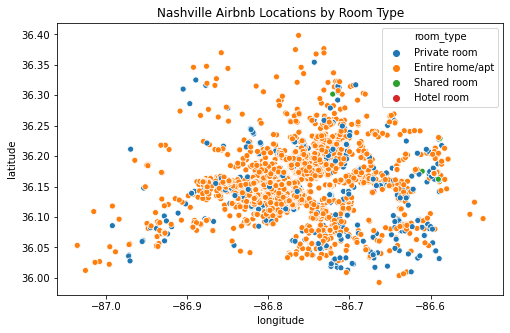

In [168]:
import seaborn as sns
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=current_listings_df, x='longitude', y='latitude', hue='room_type')
ax.set_title('Nashville Airbnb Locations by Room Type');

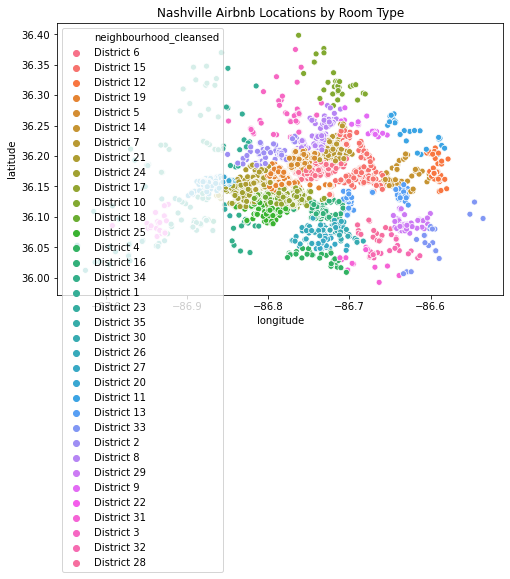

In [194]:
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=current_listings_df, x='longitude', y='latitude', hue='neighbourhood_cleansed')
ax.set_title('Nashville Airbnb Locations by Room Type');

In [170]:
cur_listings_by_zip = current_listings_df.groupby(['zipcode']).count().sort_values(by='last_scraped', ascending=False)

In [171]:
cur_listings_by_zip

,last_scraped,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
zipcode,,,,,,,,,,,,,,,,,
37203.0,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776
37207.0,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761,761
37206.0,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477
37214.0,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427
37216.0,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349
37211.0,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310
37209.0,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300
37212.0,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251
37215.0,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88


### Create dataframes for each top zipcode

In [202]:
midtown_df = reg_airbnb_df[reg_airbnb_df['zipcode']==37203]
northnash_df = reg_airbnb_df[reg_airbnb_df['zipcode']==37207]
eastnash_df = reg_airbnb_df[reg_airbnb_df['zipcode']==37206]
donelson_df = reg_airbnb_df[reg_airbnb_df['zipcode']==37214]
inglewood_df = reg_airbnb_df[reg_airbnb_df['zipcode']==37216]
crievehall_df = reg_airbnb_df[reg_airbnb_df['zipcode']==37211]
westnash_df = reg_airbnb_df[reg_airbnb_df['zipcode']==37209]
belmont_df = reg_airbnb_df[reg_airbnb_df['zipcode']==37212]

### Group Airbnb Data by Month

In [172]:
reg_airbnb_df.set_index('last_scraped', inplace=True)

In [173]:
reg_airbnb_monthly = reg_airbnb_df.resample('MS')

In [174]:
reg_airbnb_monthly.count()

,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
last_scraped,,,,,,,,,,,,,,,,,
2015-06-01,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121
2015-07-01,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615
2015-08-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-09-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-10-01,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054
2020-11-01,5943,5943,5943,5943,5943,5943,5943,5943,5943,5943,5943,5943,5943,5943,5943,5943,5943
2020-12-01,6151,6151,6151,6151,6151,6151,6151,6151,6151,6151,6151,6151,6151,6151,6151,6151,6151


In [175]:
reg_airbnb_monthly_mean = reg_airbnb_monthly.mean()
reg_airbnb_monthly_mean

,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
last_scraped,,,,,,,,,,,,,
2015-06-01,1.847859e+07,37202.099174,36.161913,-86.768430,4.223140,1.433884,1.619835,2.033058,163.115702,1.859504,1.545455,889.553719,17.206612
2015-07-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01,1.857827e+07,37201.418483,36.156564,-86.767390,4.795735,1.522275,1.800000,2.406161,200.524171,2.200000,1.747867,836.094313,17.715640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,1.089264e+08,37202.053518,36.161076,-86.769561,6.280145,1.000000,2.230096,3.715725,212.630327,1.000000,5.341427,677.050875,53.893459
2020-11-01,1.117148e+08,37202.339223,36.160839,-86.770117,6.232711,1.000000,2.218913,3.693253,211.524146,1.000000,5.443210,671.420326,54.235403
2020-12-01,1.179998e+08,37202.157698,36.160300,-86.769277,6.199805,1.000000,2.214762,3.646236,212.372868,1.000000,7.771094,666.111201,53.628841


In [176]:
reg_airbnb_monthly_mean['inventory'] = reg_airbnb_monthly.count()['neighbourhood_cleansed']

In [177]:
reg_airbnb_monthly_mean

,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,inventory
last_scraped,,,,,,,,,,,,,,
2015-06-01,1.847859e+07,37202.099174,36.161913,-86.768430,4.223140,1.433884,1.619835,2.033058,163.115702,1.859504,1.545455,889.553719,17.206612,121
2015-07-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-10-01,1.857827e+07,37201.418483,36.156564,-86.767390,4.795735,1.522275,1.800000,2.406161,200.524171,2.200000,1.747867,836.094313,17.715640,2110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,1.089264e+08,37202.053518,36.161076,-86.769561,6.280145,1.000000,2.230096,3.715725,212.630327,1.000000,5.341427,677.050875,53.893459,6054
2020-11-01,1.117148e+08,37202.339223,36.160839,-86.770117,6.232711,1.000000,2.218913,3.693253,211.524146,1.000000,5.443210,671.420326,54.235403,5943
2020-12-01,1.179998e+08,37202.157698,36.160300,-86.769277,6.199805,1.000000,2.214762,3.646236,212.372868,1.000000,7.771094,666.111201,53.628841,6151


In [213]:
reg_airbnb_monthly_mean['inventory'] = reg_airbnb_monthly_mean['inventory'].replace(0,np.nan)

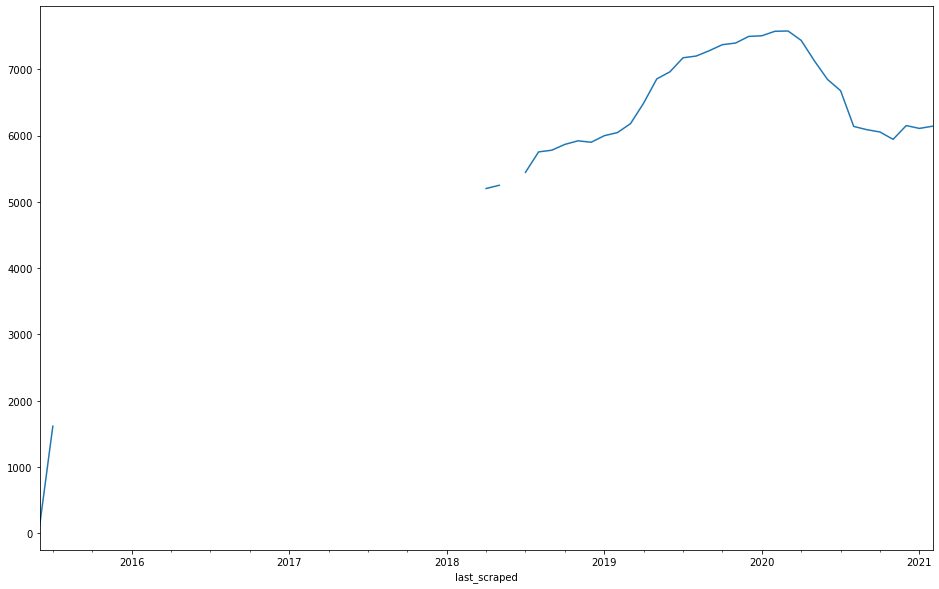

In [214]:
reg_airbnb_monthly_mean['inventory'].plot(figsize = (16,10));

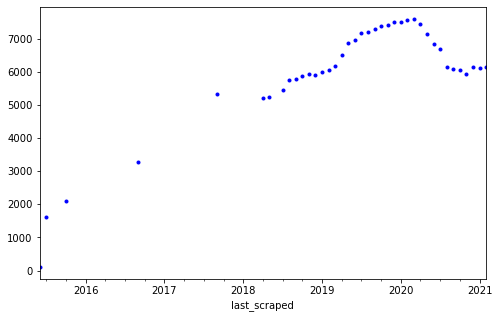

In [215]:
reg_airbnb_monthly_mean['inventory'].plot(figsize = (8,5), style='.b');

### Group Airbnb Data by Zipcode then by Month

In [179]:
reg_airbnb_df.head()

,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
last_scraped,,,,,,,,,,,,,,,,,
2015-10-03,30066816,District 1,37080.0,36.274038,-86.910077,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,125.0,2.0,2.0,1125.0,19
2015-10-03,55304,District 1,37189.0,36.259632,-86.870691,House,Private room,4,1.0,1.0,3.0,Real Bed,75.0,1.0,1.0,1125.0,0
2015-10-03,3155867,District 1,37218.0,36.217547,-86.843971,House,Private room,2,0.5,1.0,1.0,Real Bed,45.0,1.0,2.0,1125.0,60
2015-10-03,1356379,District 1,37218.0,36.212933,-86.853004,House,Private room,2,1.0,1.0,1.0,Real Bed,150.0,2.0,1.0,1125.0,0
2015-10-03,5479170,District 1,37218.0,36.221009,-86.873935,House,Private room,1,2.0,1.0,1.0,Pull-out Sofa,150.0,1.0,1.0,1125.0,4


In [180]:
reg_airbnb_df.groupby(['zipcode']).count().sort_values(by=['host_id'], ascending=False)

,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
zipcode,,,,,,,,,,,,,,,,
37203.0,48560,48560,48560,48560,48560,48560,48560,48560,48560,48560,48560,48560,48560,48560,48560,48560
37206.0,28305,28305,28305,28305,28305,28305,28305,28305,28305,28305,28305,28305,28305,28305,28305,28305
37207.0,16509,16509,16509,16509,16509,16509,16509,16509,16509,16509,16509,16509,16509,16509,16509,16509
37212.0,16474,16474,16474,16474,16474,16474,16474,16474,16474,16474,16474,16474,16474,16474,16474,16474
37209.0,14276,14276,14276,14276,14276,14276,14276,14276,14276,14276,14276,14276,14276,14276,14276,14276
37216.0,14200,14200,14200,14200,14200,14200,14200,14200,14200,14200,14200,14200,14200,14200,14200,14200
37219.0,12614,12614,12614,12614,12614,12614,12614,12614,12614,12614,12614,12614,12614,12614,12614,12614
37208.0,12590,12590,12590,12590,12590,12590,12590,12590,12590,12590,12590,12590,12590,12590,12590,12590
37214.0,11415,11415,11415,11415,11415,11415,11415,11415,11415,11415,11415,11415,11415,11415,11415,11415


## Merge Airbnb and Zillow Data for Regression Model

In [181]:
nashville_prices_df

RegionName,37013,37211,37221,37209,37076,37115,37207,37214,37203,37217,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
index,,,,,,,,,,,,,,,,,,,,,
1996-01-31,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,87304.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1996-02-29,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,87676.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
1996-03-31,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,87963.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
1996-04-30,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,88595.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
1996-05-31,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,89211.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,259031.0,293072.0,352922.0,372219.0,276223.0,231768.0,275291.0,267812.0,444604.0,236802.0,...,353126.0,544627.0,287125.0,649146.0,241525.0,244317.0,561117.0,430796.0,266038.0,383293.0
2020-11-30,261394.0,295822.0,355478.0,375011.0,278581.0,233924.0,279386.0,270533.0,446004.0,238992.0,...,356012.0,546918.0,289395.0,654508.0,242735.0,246970.0,566165.0,430763.0,268952.0,383351.0
2020-12-31,264071.0,299249.0,358583.0,378519.0,281249.0,236437.0,283637.0,273683.0,447759.0,241559.0,...,359699.0,550457.0,292281.0,660564.0,244148.0,249040.0,572388.0,432595.0,271794.0,383955.0


In [182]:
nashville_prices_monthly = nashville_prices_df.resample('MS').mean()
nashville_prices_monthly

RegionName,37013,37211,37221,37209,37076,37115,37207,37214,37203,37217,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
index,,,,,,,,,,,,,,,,,,,,,
1996-01-01,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,87304.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1996-02-01,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,87676.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
1996-03-01,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,87963.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
1996-04-01,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,88595.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
1996-05-01,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,89211.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,259031.0,293072.0,352922.0,372219.0,276223.0,231768.0,275291.0,267812.0,444604.0,236802.0,...,353126.0,544627.0,287125.0,649146.0,241525.0,244317.0,561117.0,430796.0,266038.0,383293.0
2020-11-01,261394.0,295822.0,355478.0,375011.0,278581.0,233924.0,279386.0,270533.0,446004.0,238992.0,...,356012.0,546918.0,289395.0,654508.0,242735.0,246970.0,566165.0,430763.0,268952.0,383351.0
2020-12-01,264071.0,299249.0,358583.0,378519.0,281249.0,236437.0,283637.0,273683.0,447759.0,241559.0,...,359699.0,550457.0,292281.0,660564.0,244148.0,249040.0,572388.0,432595.0,271794.0,383955.0


In [183]:
#col = nashville_prices_monthly.loc[: , "37013":"37201"]
nashville_prices_monthly['total_average'] = nashville_prices_monthly.mean(axis=1)

In [184]:
nashville_prices_monthly

RegionName,37013,37211,37221,37209,37076,37115,37207,37214,37203,37217,...,37212,37210,37204,37218,37080,37220,37219,37189,37201,total_average
index,,,,,,,,,,,,,,,,,,,,,
1996-01-01,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,87304.0,...,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN,122768.727273
1996-02-01,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,87676.0,...,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN,123137.227273
1996-03-01,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,87963.0,...,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN,123527.681818
1996-04-01,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,88595.0,...,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN,124310.181818
1996-05-01,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,89211.0,...,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN,125210.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,259031.0,293072.0,352922.0,372219.0,276223.0,231768.0,275291.0,267812.0,444604.0,236802.0,...,544627.0,287125.0,649146.0,241525.0,244317.0,561117.0,430796.0,266038.0,383293.0,375489.120000
2020-11-01,261394.0,295822.0,355478.0,375011.0,278581.0,233924.0,279386.0,270533.0,446004.0,238992.0,...,546918.0,289395.0,654508.0,242735.0,246970.0,566165.0,430763.0,268952.0,383351.0,378282.360000
2020-12-01,264071.0,299249.0,358583.0,378519.0,281249.0,236437.0,283637.0,273683.0,447759.0,241559.0,...,550457.0,292281.0,660564.0,244148.0,249040.0,572388.0,432595.0,271794.0,383955.0,381649.480000


In [231]:
nash_price_avg = pd.DataFrame(nashville_prices_monthly['total_average'])
nash_price_avg.head()

,total_average
index,
1996-01-01,122768.727273
1996-02-01,123137.227273
1996-03-01,123527.681818
1996-04-01,124310.181818
1996-05-01,125210.454545


In [235]:
year_groups = nash_price_avg.groupby(pd.Grouper(freq='A'))

In [232]:
year_groups = nash_price_avg.groupby(pd.Grouper(freq='A'))
price_annual = pd.DataFrame()

for yr, group in year_groups:
    price_annual[yr.year] = group.values.ravel()

ValueError: Length of values does not match length of index

In [187]:
regression_df = pd.merge(reg_airbnb_monthly_mean, nash_price_avg, how='inner',
                        left_index=True, right_index=True)
regression_df

,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,inventory,total_average
2015-06-01,1.847859e+07,37202.099174,36.161913,-86.768430,4.223140,1.433884,1.619835,2.033058,163.115702,1.859504,1.545455,889.553719,17.206612,121,248302.80
2015-07-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615,250573.92
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,252813.76
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,255660.52
2015-10-01,1.857827e+07,37201.418483,36.156564,-86.767390,4.795735,1.522275,1.800000,2.406161,200.524171,2.200000,1.747867,836.094313,17.715640,2110,258221.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,1.089264e+08,37202.053518,36.161076,-86.769561,6.280145,1.000000,2.230096,3.715725,212.630327,1.000000,5.341427,677.050875,53.893459,6054,375489.12
2020-11-01,1.117148e+08,37202.339223,36.160839,-86.770117,6.232711,1.000000,2.218913,3.693253,211.524146,1.000000,5.443210,671.420326,54.235403,5943,378282.36
2020-12-01,1.179998e+08,37202.157698,36.160300,-86.769277,6.199805,1.000000,2.214762,3.646236,212.372868,1.000000,7.771094,666.111201,53.628841,6151,381649.48
2021-01-01,1.191308e+08,37201.978389,36.160192,-86.769101,6.204158,1.000000,2.220530,3.650295,225.423215,1.000000,7.493942,659.377865,54.544368,6108,384369.80


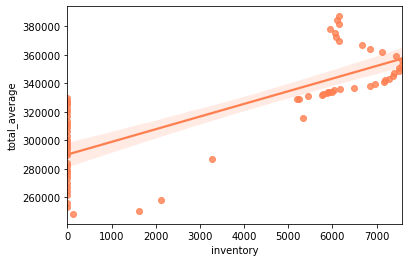

In [188]:
sns.regplot(x="inventory", y="total_average", data=regression_df, color="coral");

In [189]:
regression_df.isna().sum()

host_id              30
zipcode              30
latitude             30
longitude            30
accommodates         30
bathrooms            30
bedrooms             30
beds                 30
price                30
guests_included      30
minimum_nights       30
maximum_nights       30
number_of_reviews    30
inventory             0
total_average         0
dtype: int64

In [190]:
regression_df.dropna(inplace=True)

In [191]:
regression_df

,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,inventory,total_average
2015-06-01,1.847859e+07,37202.099174,36.161913,-86.768430,4.223140,1.433884,1.619835,2.033058,163.115702,1.859504,1.545455,889.553719,17.206612,121,248302.80
2015-07-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615,250573.92
2015-10-01,1.857827e+07,37201.418483,36.156564,-86.767390,4.795735,1.522275,1.800000,2.406161,200.524171,2.200000,1.747867,836.094313,17.715640,2110,258221.84
2016-09-01,2.994063e+07,37200.010986,36.155576,-86.763946,5.105584,1.566677,1.883430,2.602991,196.314922,2.358560,2.063168,656141.164785,25.443699,3277,286736.04
2017-09-01,5.042165e+07,37200.222056,36.158658,-86.767780,5.366467,1.647787,1.956677,2.836834,209.013691,2.710240,2.117404,404179.796887,31.943173,5332,315522.64
2018-04-01,6.067386e+07,37201.877331,36.158235,-86.769768,5.611229,1.688714,1.946164,3.054797,214.792540,2.973467,2.297827,717.517208,38.099596,5201,328666.16
2018-05-01,6.176645e+07,37202.641714,36.158711,-86.769855,5.621905,1.684000,1.937143,3.071048,213.065333,2.963429,2.272190,697.824571,39.961143,5250,329114.84
2018-07-01,6.572420e+07,37202.329600,36.159961,-86.769664,5.721998,1.705288,1.965112,3.114947,212.888542,3.033235,2.262211,702.283878,40.941241,5446,330742.80
2018-08-01,6.784536e+07,37202.036496,36.159616,-86.769322,5.727320,1.702902,1.964199,3.102364,213.645985,3.032673,3.046750,373898.911192,40.988182,5754,331859.80
2018-09-01,6.845054e+07,37201.921267,36.159399,-86.768838,5.703063,1.695795,1.963488,3.098806,210.786122,3.014535,3.238450,372299.886832,42.363731,5779,332825.48


In [204]:
regression_df['2018':]

,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,inventory,total_average
2018-04-01,6.067386e+07,37201.877331,36.158235,-86.769768,5.611229,1.688714,1.946164,3.054797,214.792540,2.973467,2.297827,717.517208,38.099596,5201,328666.16
2018-05-01,6.176645e+07,37202.641714,36.158711,-86.769855,5.621905,1.684000,1.937143,3.071048,213.065333,2.963429,2.272190,697.824571,39.961143,5250,329114.84
2018-07-01,6.572420e+07,37202.329600,36.159961,-86.769664,5.721998,1.705288,1.965112,3.114947,212.888542,3.033235,2.262211,702.283878,40.941241,5446,330742.80
2018-08-01,6.784536e+07,37202.036496,36.159616,-86.769322,5.727320,1.702902,1.964199,3.102364,213.645985,3.032673,3.046750,373898.911192,40.988182,5754,331859.80
2018-09-01,6.845054e+07,37201.921267,36.159399,-86.768838,5.703063,1.695795,1.963488,3.098806,210.786122,3.014535,3.238450,372299.886832,42.363731,5779,332825.48
2018-10-01,7.002060e+07,37208.397477,36.159824,-86.769194,5.707687,1.698398,1.959605,3.008181,214.891938,2.920232,3.401909,366724.836202,43.870121,5867,333489.56
2018-11-01,7.049511e+07,37202.302989,36.159921,-86.768966,5.718966,1.702077,1.964533,3.066543,212.723526,2.934133,3.484715,696.263807,45.616281,5921,333687.60
2018-12-01,7.096868e+07,37202.311578,36.159569,-86.769761,5.751483,1.696389,1.963384,3.082387,212.950500,2.963045,3.347177,704.318529,47.102390,5899,333652.48
2019-01-01,7.221982e+07,37202.033178,36.159516,-86.769934,5.788930,1.707569,2.071524,3.128043,229.550183,3.010837,3.456485,701.916806,46.678560,5998,334116.84
2019-02-01,7.315548e+07,37202.103722,36.159446,-86.769649,5.814888,1.712407,2.071629,3.147560,230.321257,3.010256,3.417370,701.384946,46.975848,6045,335134.40


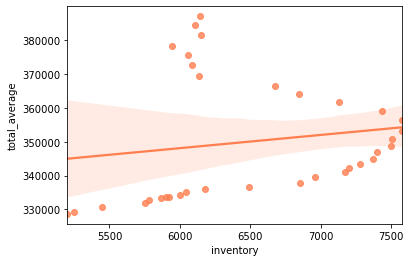

In [205]:
sns.regplot(x="inventory", y="total_average", data=regression_df['2018':], color="coral");

In [192]:
regression_df.to_csv("cleaned_data/reg_data_clean.csv")

## Clean for Time Series Model

In [216]:
reg_airbnb_monthly_mean

,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,inventory
last_scraped,,,,,,,,,,,,,,
2015-06-01,1.847859e+07,37202.099174,36.161913,-86.768430,4.223140,1.433884,1.619835,2.033058,163.115702,1.859504,1.545455,889.553719,17.206612,121.0
2015-07-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615.0
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01,1.857827e+07,37201.418483,36.156564,-86.767390,4.795735,1.522275,1.800000,2.406161,200.524171,2.200000,1.747867,836.094313,17.715640,2110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,1.089264e+08,37202.053518,36.161076,-86.769561,6.280145,1.000000,2.230096,3.715725,212.630327,1.000000,5.341427,677.050875,53.893459,6054.0
2020-11-01,1.117148e+08,37202.339223,36.160839,-86.770117,6.232711,1.000000,2.218913,3.693253,211.524146,1.000000,5.443210,671.420326,54.235403,5943.0
2020-12-01,1.179998e+08,37202.157698,36.160300,-86.769277,6.199805,1.000000,2.214762,3.646236,212.372868,1.000000,7.771094,666.111201,53.628841,6151.0


In [217]:
reg_airbnb_monthly_mean.isnull().sum()

host_id              30
zipcode              30
latitude             30
longitude            30
accommodates         30
bathrooms            30
bedrooms             30
beds                 30
price                30
guests_included      30
minimum_nights       30
maximum_nights       30
number_of_reviews    30
inventory            30
dtype: int64

In [218]:
ts_airbnb = reg_airbnb_monthly_mean.ffill()

In [219]:
ts_airbnb

,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,inventory
last_scraped,,,,,,,,,,,,,,
2015-06-01,1.847859e+07,37202.099174,36.161913,-86.768430,4.223140,1.433884,1.619835,2.033058,163.115702,1.859504,1.545455,889.553719,17.206612,121.0
2015-07-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615.0
2015-08-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615.0
2015-09-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615.0
2015-10-01,1.857827e+07,37201.418483,36.156564,-86.767390,4.795735,1.522275,1.800000,2.406161,200.524171,2.200000,1.747867,836.094313,17.715640,2110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,1.089264e+08,37202.053518,36.161076,-86.769561,6.280145,1.000000,2.230096,3.715725,212.630327,1.000000,5.341427,677.050875,53.893459,6054.0
2020-11-01,1.117148e+08,37202.339223,36.160839,-86.770117,6.232711,1.000000,2.218913,3.693253,211.524146,1.000000,5.443210,671.420326,54.235403,5943.0
2020-12-01,1.179998e+08,37202.157698,36.160300,-86.769277,6.199805,1.000000,2.214762,3.646236,212.372868,1.000000,7.771094,666.111201,53.628841,6151.0


In [220]:
ts_airbnb.isnull().sum()

host_id              0
zipcode              0
latitude             0
longitude            0
accommodates         0
bathrooms            0
bedrooms             0
beds                 0
price                0
guests_included      0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
inventory            0
dtype: int64

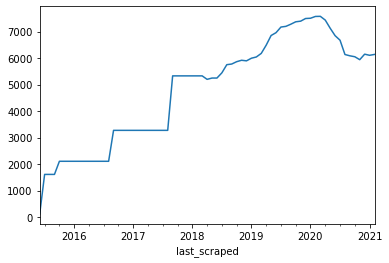

In [222]:
ts_airbnb['inventory'].plot();

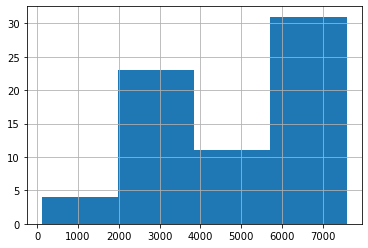

In [227]:
ts_airbnb['inventory'].hist(bins=4);

In [236]:
ts_df = pd.merge(ts_airbnb, nash_price_avg, how='inner',
                        left_index=True, right_index=True)
ts_df

,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,inventory,total_average
2015-06-01,1.847859e+07,37202.099174,36.161913,-86.768430,4.223140,1.433884,1.619835,2.033058,163.115702,1.859504,1.545455,889.553719,17.206612,121.0,248302.80
2015-07-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615.0,250573.92
2015-08-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615.0,252813.76
2015-09-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615.0,255660.52
2015-10-01,1.857827e+07,37201.418483,36.156564,-86.767390,4.795735,1.522275,1.800000,2.406161,200.524171,2.200000,1.747867,836.094313,17.715640,2110.0,258221.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,1.089264e+08,37202.053518,36.161076,-86.769561,6.280145,1.000000,2.230096,3.715725,212.630327,1.000000,5.341427,677.050875,53.893459,6054.0,375489.12
2020-11-01,1.117148e+08,37202.339223,36.160839,-86.770117,6.232711,1.000000,2.218913,3.693253,211.524146,1.000000,5.443210,671.420326,54.235403,5943.0,378282.36
2020-12-01,1.179998e+08,37202.157698,36.160300,-86.769277,6.199805,1.000000,2.214762,3.646236,212.372868,1.000000,7.771094,666.111201,53.628841,6151.0,381649.48
2021-01-01,1.191308e+08,37201.978389,36.160192,-86.769101,6.204158,1.000000,2.220530,3.650295,225.423215,1.000000,7.493942,659.377865,54.544368,6108.0,384369.80


In [237]:
ts_df.to_csv("cleaned_data/ts_data_clean.csv")